In [1]:
#Linear Regression models the relationship between the dependent variable (y) and one or more independent variables (x) by fitting a linear equation to observed data. In simple terms, it finds the best-fitting straight line through the data points

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Read the data
#here we are loading a data from sklearn
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [7]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [ ]:
#PROBLEM STATEMENT>> To predict disease progression one year after baseline given 10 baseline feature

In [8]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [9]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [10]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [14]:
data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
data['target'] = diabetes.target

In [15]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [16]:
#EDA, DATCLEANING, DATA PREPARATION, FEATURE ENGINEERING

In [17]:
#DIVIDE THE DATA INTO X, Y, for slr we take only one feature

X = data[["bmi"]]
y = data["target"]

In [18]:
X

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
5,-0.040696
6,-0.047163
7,-0.001895
8,0.061696
9,0.039062


In [19]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
5       97.0
6      138.0
7       63.0
8      110.0
9      310.0
10     101.0
11      69.0
12     179.0
13     185.0
14     118.0
15     171.0
16     166.0
17     144.0
18      97.0
19     168.0
20      68.0
21      49.0
22      68.0
23     245.0
24     184.0
25     202.0
26     137.0
27      85.0
28     131.0
29     283.0
       ...  
412    261.0
413    113.0
414    131.0
415    174.0
416    257.0
417     55.0
418     84.0
419     42.0
420    146.0
421    212.0
422    233.0
423     91.0
424    111.0
425    152.0
426    120.0
427     67.0
428    310.0
429     94.0
430    183.0
431     66.0
432    173.0
433     72.0
434     49.0
435     64.0
436     48.0
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [20]:
#split the data into train-test
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [22]:
X_train

,bmi
438,-0.015906
232,0.000261
80,0.012117
46,-0.011595
381,-0.089197
224,-0.066563
85,0.071397
338,-0.033151
81,-0.022373
400,0.045529


In [23]:
X_test

,bmi
246,-0.032073
425,-0.040696
293,0.092953
31,-0.065486
359,0.005650
437,0.019662
290,0.076786
439,-0.015906
284,-0.022373
4,-0.036385


In [24]:
y_train

438    104.0
232    259.0
80     143.0
46     190.0
381    104.0
224     77.0
85     141.0
338    214.0
81      51.0
400    175.0
369    167.0
233     90.0
260     39.0
228    160.0
185    101.0
122    180.0
11      69.0
117    281.0
139    281.0
218    214.0
93      96.0
420    146.0
168    268.0
324    249.0
41      55.0
180    107.0
162    172.0
95     162.0
106    134.0
92      48.0
       ...  
352     77.0
241    177.0
215    263.0
68     160.0
50     155.0
398    242.0
413    113.0
156     25.0
252     91.0
395    258.0
402    168.0
357    221.0
254    310.0
276    283.0
178     81.0
281     94.0
390    277.0
237     72.0
71     270.0
129    268.0
144    174.0
335     96.0
133     83.0
203    222.0
393     69.0
255    153.0
72     202.0
396     43.0
235    124.0
37     276.0
Name: target, Length: 353, dtype: float64

In [25]:
y_test

246     78.0
425    152.0
293    200.0
31      59.0
359    311.0
437    178.0
290    332.0
439    132.0
284    156.0
4      135.0
440    220.0
285    233.0
192     91.0
389     51.0
159    195.0
310    109.0
375    217.0
429     94.0
258     89.0
424    111.0
197    129.0
283    181.0
373    168.0
5       97.0
128    115.0
207    202.0
292     84.0
314    147.0
304    253.0
17     144.0
       ...  
90      98.0
347     88.0
422    233.0
377    235.0
315     97.0
251    243.0
165     59.0
6      138.0
230    220.0
186    137.0
433     72.0
353    109.0
242     71.0
171     74.0
385    219.0
206    196.0
58     170.0
331    199.0
351     71.0
208    155.0
380     52.0
257     63.0
383     88.0
18      97.0
40     100.0
277     64.0
132    107.0
213     49.0
286     60.0
256    346.0
Name: target, Length: 89, dtype: float64

In [ ]:
#Scaling (optional)

In [27]:
#model training

from sklearn.linear_model import LinearRegression

In [28]:
#instaniate an LR model
model = LinearRegression()

In [29]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
#training of model
model.fit(X_train, y_train) #at backend, it will use gradient descent to give optimal coefficients

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
model.coef_

array([977.74040067])

In [32]:
model.intercept_

151.66780594915292

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([120.30830405, 111.87774078, 242.55147149,  87.63987137,
       157.19201836, 170.89168368, 226.74416536, 136.11561019,
       129.79268773, 116.09302241, 189.86045104, 131.90032855,
       121.36212446, 152.97673673, 194.07573268, 215.15214086,
       148.76145509, 119.25448364, 127.68504691, 162.46112041,
       155.08437755, 100.28571628, 141.38471223, 111.87774078,
        90.8013326 , 196.1833735 , 129.79268773, 190.91427145,
       113.9853816 , 163.51494082, 145.59999387, 150.86909591,
       205.66775718, 119.25448364,  95.01661424, 167.73022245,
        80.26312851, 210.93685922, 190.91427145, 127.68504691,
       161.4073    , 145.59999387, 121.36212446, 138.223251  ,
       132.95414896, 102.3933571 , 179.32224695, 113.9853816 ,
       209.88303881, 131.90032855, 144.54617346, 200.39865513,
       107.66245914, 105.55481833, 174.05314491, 137.16943059,
       158.24583877, 121.36212446,  83.42458974, 126.6312265 ,
       122.41594487, 227.79798576, 161.4073    , 131.90

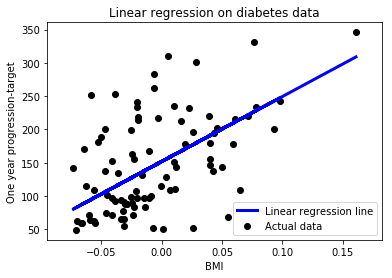

In [35]:
#visualise the result
plt.scatter(X_test, y_test, color = 'black', label = 'Actual data')
plt.plot(X_test, y_pred, color = 'blue', linewidth = 3, label = "Linear regression line")
plt.xlabel("BMI")
plt.ylabel("One year progression-target")
plt.title("Linear regression on diabetes data")
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mean_squared_error(y_test, y_pred)

3989.828972760931